In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import train_test_split

fuel = pd.read_csv('../../datasets/Intro_to_Deep_Learning/dl_course_dataset/fuel.csv')

X = fuel.copy()
y = X.pop('FE')

preprocessor = make_column_transformer(
    (StandardScaler(),
     make_column_selector(dtype_include=np.number)),
    (OneHotEncoder(sparse=False),
     make_column_selector(dtype_include=object))
)

X = preprocessor.fit_transform(X)
y = np.log(y)

input_shape = [X.shape[1]]
print("Input shape :{}".format(input_shape))

Input shape :[50]


In [4]:
fuel.head()

pd.DataFrame(X[:10, :]).head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.913643,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.913643,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.530594,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.530594,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.296693,2.120794,0.524148,-1.458464,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

In [6]:
model.compile(
    optimizer='adam',
    loss='mae'
)

In [7]:
history = model.fit(
    X, y,
    batch_size=128,
    epochs=200
)

Epoch 1/200
9/9 [==============================] - 0s 1ms/step - loss: 2.9411
Epoch 2/200
9/9 [==============================] - 0s 2ms/step - loss: 1.1773
Epoch 3/200
9/9 [==============================] - 0s 1ms/step - loss: 0.6424
Epoch 4/200
9/9 [==============================] - 0s 1ms/step - loss: 0.3678
Epoch 5/200
9/9 [==============================] - 0s 1ms/step - loss: 0.2399
Epoch 6/200
9/9 [==============================] - 0s 1ms/step - loss: 0.1892
Epoch 7/200
9/9 [==============================] - 0s 1ms/step - loss: 0.1491
Epoch 8/200
9/9 [==============================] - 0s 1

<AxesSubplot:>

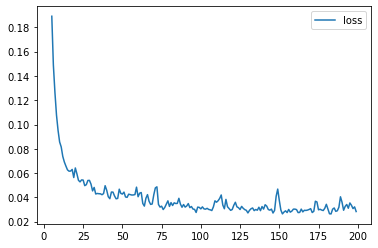

In [8]:
import pandas as pd
history_df = pd.DataFrame(history.history)

history_df.loc[5:, ['loss']].plot()

In [9]:
learning_rate = 0.05
batch_size = 32
num_examples = 256
"""
animate_sgd(
    learning_rate=learning_rate,
    batch_size=batch_size,
    num_examples=num_examples,
    steps=50,
    true_w=3.0,
    true_b=2.0
)
"""

NameError: name 'animate_sgd' is not defined